## Image Processing with machine learning

#### Feature processing

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

Load the training dataset into a temporary variable train_data. The dict contains two variables X and y. X is our 4D matrix -32x32x3x531131 of images and 1-D matrix of the corresponding labels - 0-9 with 10 being 0. To access the i-th image use X[:,:,:,i] and its label would be y[i]

In [2]:
# lets do this for image25
# load our dataset
train_data  = scipy.io.loadmat('train_32x32.mat')

# X is currently in shape (32, 32, 3, 531131). We need to move the last dimension to the front.
# X should be reshaped to (531131, 32 * 32 * 3)

# extract the images and labels from the dictionary object
X = train_data['X']
y = train_data['y']

print(X.shape, y.shape)

(32, 32, 3, 73257) (73257, 1)


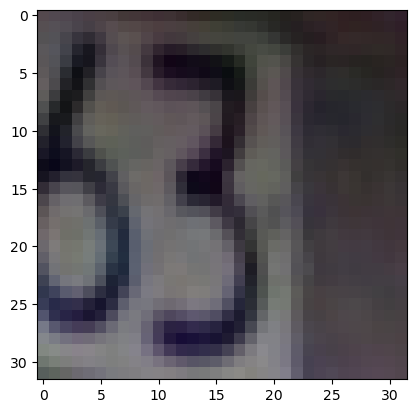

[3]


In [3]:
# view an image (e.g. 25) and print its corresponding label
img_index = 25
plt.imshow(X[:,:,:,img_index])
plt.show()
print(y[img_index])
%matplotlib inline

We load the image show the house number 6 and the label printed is also 6. TO use this images with ML we need to vectorise them. This involves stacking up the 3 dimensions of each image (width x height x colour channels) to transform it into a 1-D matrix. This will gives us our feature vector, although it's worth noting that this is not really a feature vector in the usual sense. Features refere to quantification of a specific trait of the image. Raw pixels can used successfully in ML algorithms but this is typical with more complex models such as CNN (CNN can learn specific features themselves with their network layers).

Here we will use Random Forest classification with default hyperparameters.

In [4]:
from sklearn.ensemble import RandomForestClassifier

#instantiate the model
clf = RandomForestClassifier()
clf

RandomForestClassifier()

### Training the model
Ready to train and test our data. Before that we need to split our total collection of images into two sets:
1) one for training
2) one for testing.
Keeping the testing set completely separate from the training set is important bc we need to be sure that the modell will perform well in the real world. Once trained, it will have seen many example images of house numbers. We want to ensure when presented with new images of numbers it has not seen before, that is has actually learnt something from the training can generalise that knowledge.

In [28]:
# Reshape X and y correctly
# X needs to be reshaped to (number_of_samples, features)
# y should be reshaped to (number_of_samples,)


# Reshape 'X' and 'y' 
# properly so that they have consistent sample sizes
# X2 = X.reshape(4, 3, -1)
# X is currently in shape (32, 32, 3, 531131). We need to move the last dimension to the front.
# X should be reshaped to (531131, 32 * 32 * 3)
#X2 = X.transpose(3, 0, 1, 2).reshape(-1, 73257)
X2 = X.transpose(3, 0, 1, 2).reshape( 73257,-1)
X2.shape


(73257, 3072)

In [26]:
# y is currently in shape (531131, 1). We need to reshape it to (531131,)
y2 = y.reshape(-1)
y2.shape


(73257,)

In [27]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

#fit the model
clf.fit(X_train, y_train)

RandomForestClassifier()

The fewer images you use, the faster the process
will train so you can reduce the size of the dataset, but keep in mind that using fewer images will also reduce the accuracy of
the model

### Test results

In [29]:
from sklearn.metrics import accuracy_score

preds = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preds))

Accuracy: 0.7095277095277095


So our model has learnt how to classify house numbers from Google Street View
with 76% accuracy simply by showing it a few hundred thousand examples. Given a
baseline measure of 10% accuracy for random guessing, we’ve made significant
progress. There’s still a lot of room for improvement here, but it’s a great result from
a simple untuned learning algorithm on a real-world problem.